## Нелинейная регрессия
Необходимо реализовать нейросетевую аппроксимацию для каждой из двух следущих функций, заданных на отрезке:  
$$f_1(x) = \sin(x + x^2), x\in[0, 5]$$
$$f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$$


In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [8]:
import torch, torch.nn as nn

# Hyper-parameters 
input_size = 1
hidden_size1 = 200
hidden_size2 = 150
hidden_size3 = 120
hidden_size4 = 70
num_classes = 1
N_train = 100  # кол-во точек в x_train

model = nn.Sequential(nn.Linear(input_size, hidden_size1), nn.Tanh(), 
                      nn.Linear(hidden_size1, hidden_size2), nn.ReLU(), 
                      nn.Linear(hidden_size2, hidden_size3), nn.Sigmoid(), 
                      nn.Linear(hidden_size3, hidden_size4), nn.Sigmoid(), 
                      nn.Linear(hidden_size4, num_classes))

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

$$f_1(x) = \sin(x + x^2), x\in[0, 5]$$

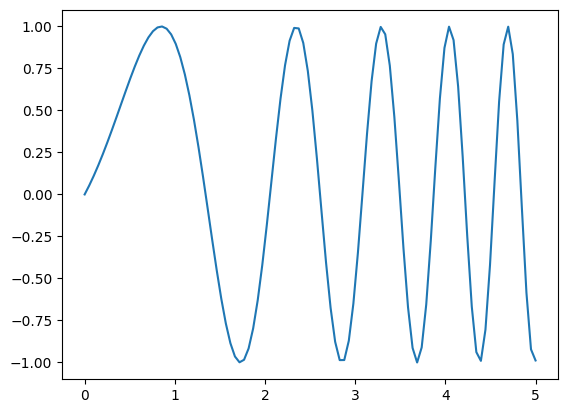

In [9]:
def f1(x):
    return np.sin(x + x**2, dtype='float32')

xx = np.linspace(0,5,100)
yy = f1(xx)
plt.plot(xx, yy)

Iter [10000/150000], Loss: 0.4172
Iter [20000/150000], Loss: 0.3422
Iter [30000/150000], Loss: 0.2970
Iter [40000/150000], Loss: 0.2653
Iter [50000/150000], Loss: 0.2305
Iter [60000/150000], Loss: 0.1998
Iter [70000/150000], Loss: 0.1710
Iter [80000/150000], Loss: 0.1415
Iter [90000/150000], Loss: 0.1090
Iter [100000/150000], Loss: 0.0978
Iter [110000/150000], Loss: 0.0864
Iter [120000/150000], Loss: 0.0752
Iter [130000/150000], Loss: 0.0575
Iter [140000/150000], Loss: 0.0173
Iter [150000/150000], Loss: 0.0015


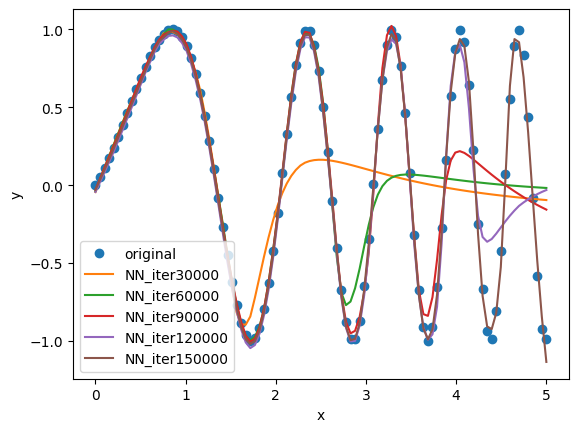

In [10]:
x_train = torch.from_numpy(np.linspace(0, 5, N_train, dtype='float32').reshape((N_train, 1)))
y_train = f1(x_train)

iter_number = 150000

plt.plot(x_train, y_train, 'o', label='original')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

for i in range(iter_number):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # W(t+1) = W(t) - lr * W.grad

    if (i+1) % 10000 == 0:
        print ('Iter [{}/{}], Loss: {:.4f}'.format(i+1, iter_number, loss.item()))
        
    if (i+1) % 30000 == 0:
        outputs = model(x_train.reshape((len(x_train), 1)))
        plt.plot(x_train, outputs.detach().numpy(), label=f'NN_iter{i+1}')
        plt.legend()

Нейросетевая аппроксимация фукнции 1 на тех же точках, на которых она обучалась (100 штук):

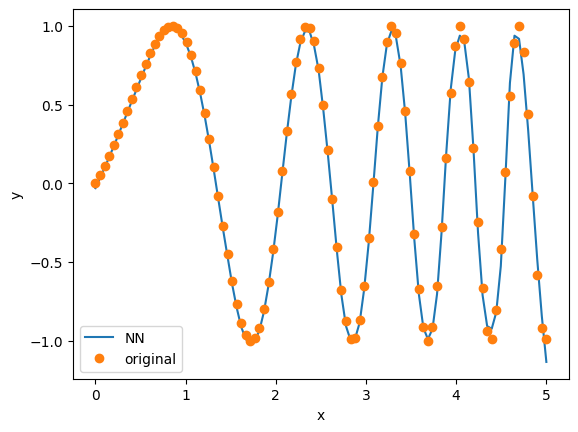

In [11]:
outputs = model(x_train.reshape((len(x_train), 1)))
plt.plot(x_train, outputs.detach().numpy(), label='NN')
plt.plot(x_train, y_train, 'o', label='original')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Нейросетевая аппроксимация функции 1 на 49 точках (np.linspace(0, 5, 49)):

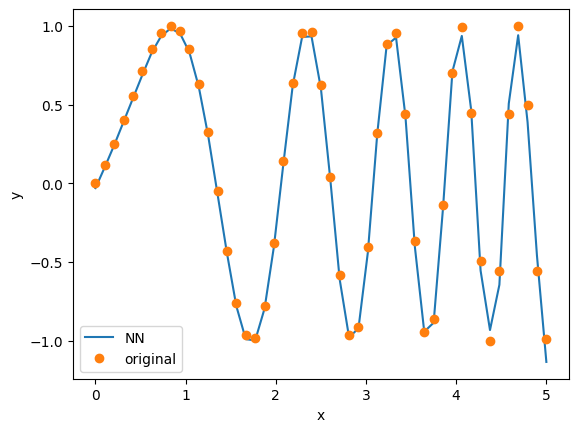

In [12]:
x_test = torch.from_numpy(np.linspace(0, 5, 49, dtype='float32').reshape((49, 1)))
y_test = f1(x_test)

outputs = model(x_test.reshape((len(x_test), 1)))
plt.plot(x_test, outputs.detach().numpy(), label='NN')
plt.plot(x_test, y_test, 'o', label='original')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

$$f_2(x) = ln(x + 2 \sin x), x\in[1, 10]$$

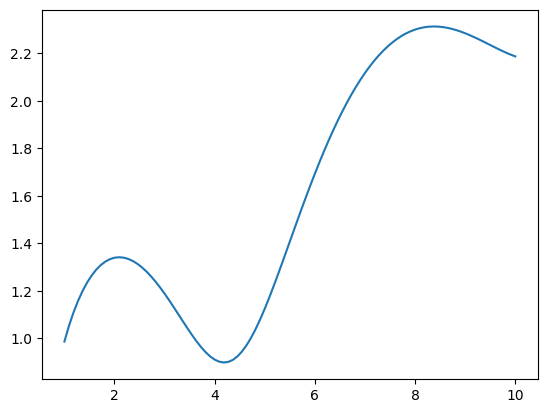

In [3]:
def f2(x):
    return np.log(x + 2 * np.sin(x))

xx = np.linspace(1,10,100)
yy = f2(xx)
plt.plot(xx, yy )

In [4]:
model = nn.Sequential(nn.Linear(input_size, hidden_size1), nn.Tanh(), 
                      nn.Linear(hidden_size1, hidden_size2), nn.ReLU(), 
                      nn.Linear(hidden_size2, hidden_size3), nn.Sigmoid(), 
                      nn.Linear(hidden_size3, hidden_size4), nn.Sigmoid(), 
                      nn.Linear(hidden_size4, num_classes))

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Iter [10000/100000], Loss: 0.0138
Iter [20000/100000], Loss: 0.0039
Iter [30000/100000], Loss: 0.0027
Iter [40000/100000], Loss: 0.0022
Iter [50000/100000], Loss: 0.0017
Iter [60000/100000], Loss: 0.0013
Iter [70000/100000], Loss: 0.0009
Iter [80000/100000], Loss: 0.0006
Iter [90000/100000], Loss: 0.0016
Iter [100000/100000], Loss: 0.0005


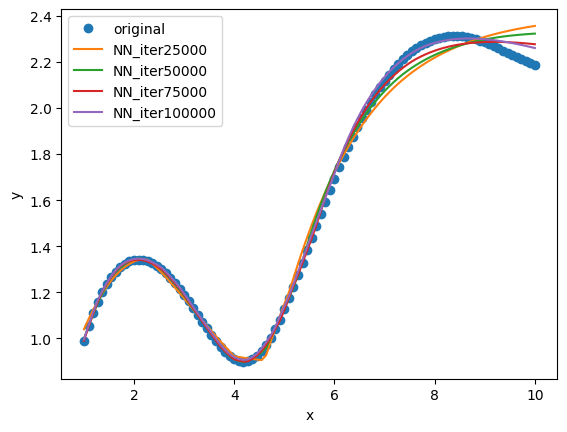

In [5]:
x_train = torch.from_numpy(np.linspace(1, 10, N_train, dtype='float32').reshape((N_train, 1)))
y_train = f2(x_train)

iter_number = 100000

plt.plot(x_train, y_train, 'o', label='original')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

for i in range(iter_number):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # W(t+1) = W(t) - lr * W.grad

    if (i+1) % 10000 == 0:
        print ('Iter [{}/{}], Loss: {:.4f}'.format(i+1, iter_number, loss.item()))
        
    if (i+1) % 25000 == 0:
        outputs = model(x_train.reshape((len(x_train), 1)))
        plt.plot(x_train, outputs.detach().numpy(), label=f'NN_iter{i+1}')
        plt.legend()

Нейросетевая аппроксимация фукнции 2 на тех же точках, на которых она обучалась (100 штук):

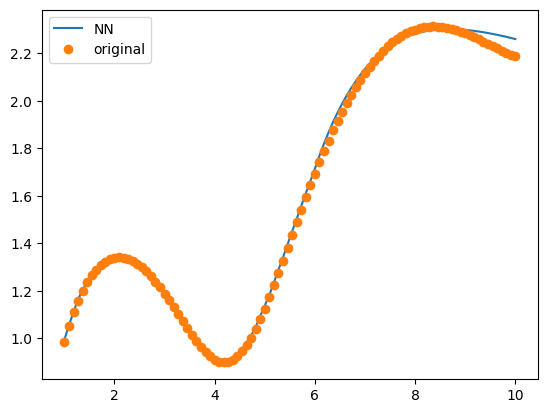

In [6]:
outputs = model(x_train.reshape((len(x_train), 1)))
plt.plot(x_train, outputs.detach().numpy(), label='NN')
plt.plot(x_train, y_train, 'o', label='original')
plt.legend()

Нейросетевая аппроксимация функции 1 на 9 точках (np.linspace(0, 5, 49)):

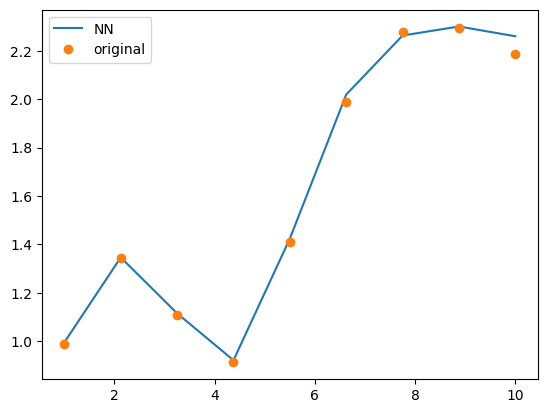

In [7]:
x_test = torch.from_numpy(np.linspace(1, 10, 9, dtype='float32').reshape((9, 1)))
y_test = f2(x_test)

outputs = model(x_test.reshape((len(x_test), 1)))
plt.plot(x_test, outputs.detach().numpy(), label='NN')
plt.plot(x_test, y_test, 'o', label='original')
plt.legend()